In [12]:
import random
import csv
import re
from collections import defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import os
from collections import Counter
import seaborn as sns

In [153]:
def plot_neuron_distribution_grid_bar(model_paths, layer_counts, keyword_groups):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    n_rows = len(model_paths)
    n_cols = len(keyword_groups)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5.5 * n_cols, 4.5 * n_rows), sharey='row')
    plt.subplots_adjust(hspace=0.4, wspace=0.3)  # more spacing between plots

    model_names = list(model_paths.keys())
    categories = list(keyword_groups.keys())

    for i, (model_name, csv_path) in enumerate(model_paths.items()):
        max_layers = layer_counts[model_name]

        for j, (category, keywords) in enumerate(keyword_groups.items()):
            ax = axes[i][j] if n_rows > 1 else axes[j]

            # Collect data for all keywords into a single DataFrame
            plot_data = []
            for keyword in keywords:
                neurons = find_matching_neurons(csv_path, keyword)
                if not neurons:
                    continue
                layer_dist = count_by_first_index(neurons, max_layers)
                for layer, value in enumerate(layer_dist):
                    plot_data.append({
                        "Layer": layer,
                        "Frequency": value,
                        "Keyword": keyword
                    })

            df = pd.DataFrame(plot_data)
            sns.barplot(
                data=df,
                x="Layer", y="Frequency", hue="Keyword",
                ax=ax, errorbar=None
            )

            ax.set_title(f"{model_name} - {category}")
            ax.set_ylim(0, 1)
            ax.set_xlabel("Layer")
            if j == 0:
                ax.set_ylabel("Relative Frequency")
            else:
                ax.set_ylabel("")

    plt.tight_layout()
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '../../../Downloads/esm8B_500k_neuron_explanations_final.csv'

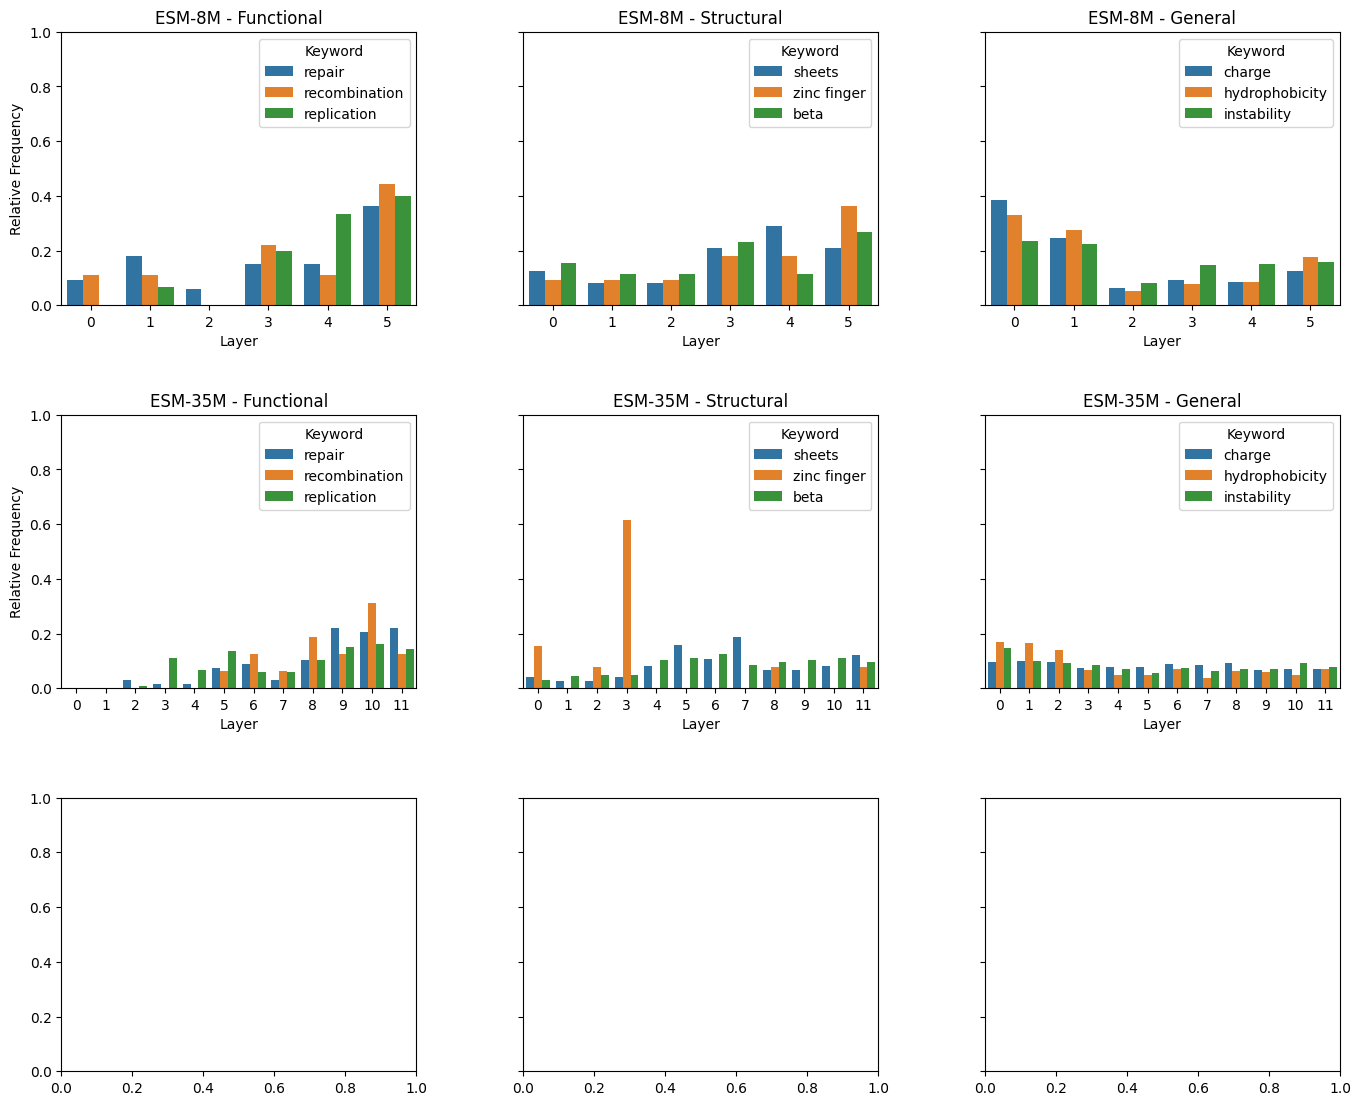

In [155]:
model_paths = {
    "ESM-8M": "../../../Downloads/esm8M_500k_neuron_explanations_final.csv",
    "ESM-35M": "../../../Downloads/esm35M_500k_neuron_explanations_final.csv",
    "ESM-8B": "../../../Downloads/esm8B_500k_neuron_explanations_final.csv",
}

layer_counts = {
    "ESM-8M": 6,
    "ESM-35M": 12,
    "ESM-8B": 36,
}

keyword_groups = {
    "Functional": ["repair", "recombination", "replication"],
    "Structural": ["sheets", "zinc finger", "beta"],
    "General": ["charge", "hydrophobicity", "instability"],
}

plot_neuron_distribution_grid_bar(model_paths, layer_counts, keyword_groups)

In [ ]:
nuerons = find_matching_neurons("../../../Downloads/esm8M_500k_neuron_explanations_final.csv", "instability")
count_by_first_index(nuerons, 6)

[0.23580786026200873,
 0.22270742358078602,
 0.08296943231441048,
 0.14847161572052403,
 0.15283842794759825,
 0.1572052401746725]

In [147]:
nuerons = find_matching_neurons("../../../Downloads/esm35M_500k_neuron_explanations_final.csv", "instability")
count_by_first_index(nuerons, 12)

[0.14760147601476015,
 0.0996309963099631,
 0.09225092250922509,
 0.08487084870848709,
 0.07011070110701106,
 0.055350553505535055,
 0.07380073800738007,
 0.06273062730627306,
 0.07011070110701106,
 0.07195571955719557,
 0.09225092250922509,
 0.07933579335793357]

FileNotFoundError: [Errno 2] No such file or directory: '../../../Downloads/esm8B_500k_neuron_explanations_final.csv'

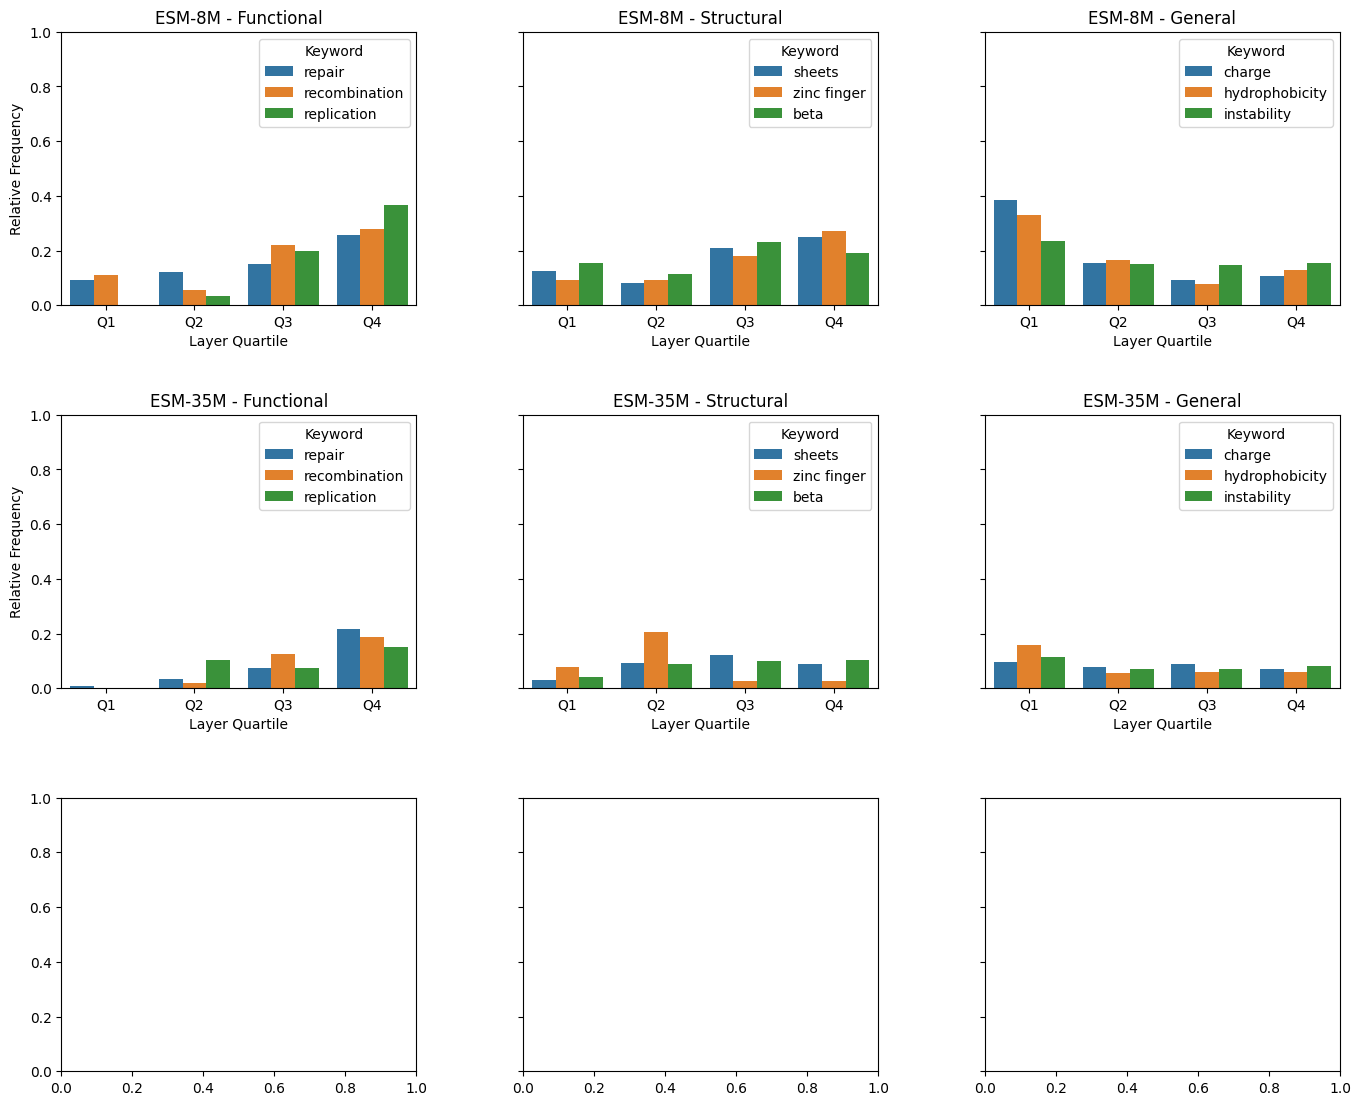

In [158]:
plot_neuron_distribution_grid_quartile_bins(model_paths, layer_counts, keyword_groups)
